# Описание

Данная тетрадка содержит в себе первое задание по компьютерному практикуму по экономике. Вам предстоит освоить ряд важных библиотек для Python, изучить основы Latex, а также создать экономические модели.

Все задания связаны с моделями бюджетных ограничений и предпочтений. 
* В первой модели существуют только два товара определенной цены. 
* Во второй модели определены 3 параметра: название, цена и количество товара, которое потребитель может получить бесплатно. За товар сверх этого количества необходимо заплатить указанную цену.
* В третьей модели для каждого товара есть порог количества. Товар в количестве ниже данного порога стоит одну цену, а каждая единица товара выше этого порога стоит другую цену.

Ожидается, что Вы разберетесь в представленных примерах и по их образцу сделаете более сложные задания. Также стремитесь к тому, чтобы Ваш код и Ваши пояснения были понятными. При необходимости комментируйте код и оставляйте заметки в текстовых полях.

## Баллы

За каждое задание начисляется определенное количество баллов. Если задание решено не полностью, то за него может быть начислена только часть баллов.

|№ Задания|Балл|
|---|---|
|[Задание 1](#task_1)|0.5|
|[Задание 2](#task_2)|0.5|
|[Задание 3](#task_3)|0.5|
|[Задание 4](#task_4)|0.5|
|[Задание 5](#task_5)|1|
|[Задание 6](#task_6)|0.5|
|[Задание 7](#task_7)|1|
|[Задание 8](#task_8)|1|
|[Задание 9](#task_9)|0.5|
|[Задание 10](#task_10)|0.5|
|[Задание 11](#task_11)|1|
|[Задание 12](#task_12)|1|
|[Задание 13](#task_13)|1.5|
|Всего|10|

## Импорт библиотек

In [1]:
#Импортируем необходимые библиотеки

import math
import numpy as np # Линейная алгебра и многомерные массивы
import pandas as pd # Работа с таблицами данных
import matplotlib.pyplot as plt # Графическая библиотека
from ipywidgets import widgets, interact # Интерактивные виджеты

# Техническая функция. Иногда потребуется сравнивать два float числа на равенство
def is_equal(x, y=50):
    return abs(x-y) < 1e-6

# Модель 1

## Описание класса

В данной модели у каждого товара есть только два параметра: название и цена за единицу.

In [215]:
# Создадим класс для товаров модели
class Good1():
    def __init__(self, name, price):
        self.name = name
        self.price = price

## Проверка бюджетного ограничения

Напишем функцию, которая проверит, удовлетворяет ли конкретная точка бюджетным ограничениям.

In [216]:
def budget_test1(g1: Good1, g2: Good1, budget, x1=0, x2=0):
    '''
    Проверка расположения точки (x1, x2) относительно бюджетного множества:
        Если внутри бюджетного множества, то возвращается значение 1,
        Если на границе бюджетного множества, то возвращается значение 0,
        Если вне бюджетного множества, то возвращается значение -1.
    '''
    result = x1*g1.price + x2*g2.price
    if (is_equal(result, budget)): # Поскольку значения типа float, необходимо сравнивать на равенство с погрешностью
        return 0
    elif (result < budget):
        return 1
    else:
        return -1

g1 = Good1("Яблоки", 5)
g2 = Good1("Груши", 5)
budget = 100    
print(budget_test1(g1, g2, budget, 1, 1))
print(budget_test1(g1, g2, budget, 10, 10))
print(budget_test1(g1, g2, budget, 100, 100))

1
0
-1


## Графическое представление

Напишем функцию, которая будет визуализировать бюджетное множество и проверяемую точку.

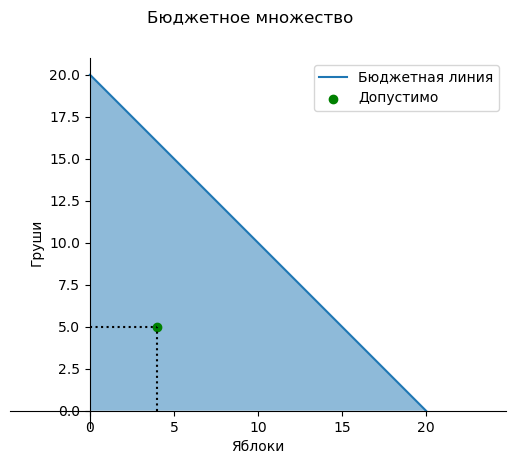

In [217]:
def plot_budget1(g1, g2, budget, x1=0, x2=0):
    '''
    Построение графика бюджетного множества и расположения проверяемой точки
    '''
    
    # График будет построен по двум точкам (0, budget/g2.price) и (budget/g1.price, 0)
    x_points = [0, budget/g1.price] 
    y_points = [budget/g2.price, 0]
    

    fig, ax = plt.subplots() # Создаем фигуру
    fig.suptitle("Бюджетное множество")
    
    ax.plot(x_points, y_points, label="Бюджетная линия") # Строим прямую по двум точкам
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5) # Заливаем область под графиком с прозрачностью (alpha) 0.5
    
    point_status = budget_test1(g1, g2, budget, x1, x2) # Находим статус проверяемой точки
    
    # В зависимости от статуса определяем цвет точки и надпись
    if point_status == 1:
        point_color = "green"
        point_label = "Допустимо"
    elif point_status == 0:
        point_color = "yellow"
        point_label = "На границе"
    else: 
        point_color = "red"
        point_label = "Недопустимо"
    
    ax.scatter(x1, x2, color=point_color, label=point_label) # Рисуем точку
    ax.plot([x1, x1], [0, x2], 'k:') # Добавляем вертикальную черную (k) пунктирную (:) линию к точке (x,y)
    ax.plot([0, x1], [x2, x2], 'k:') # Добавляем горизонтальную черную (k) пунктирную (:) линию к точке (x,y)
    
    # Добавляем название осей
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)

    # Сдвигаем и скрываем оси так, чтобы получились декартовы координаты
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    
    ax.axis('equal') # Принудительно делаем оси равными
    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show() # Отображаем рисунок


g1 = Good1("Яблоки", 5)
g2 = Good1("Груши", 5)
budget = 100   
plot_budget1(g1, g2, budget, 4, 5);

## Интерактивное представление

In [218]:
# Интерактивный виджет
def interactive_plot1(p1, p2, budget, x1, x2):
    g1 = Good1("Яблоки", p1) # Создаем первый товар с ценой p1
    g2 = Good1("Груши", p2) # Создаем второй товар с ценой p2
    plot_budget1(g1, g2, budget, x1, x2);

interact(interactive_plot1, p1=(1, 10), p2 = (1, 10), budget=(1,100), x1 = (1,10), x2=(1,10));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

## Работа с таблицами

В данном разделе мы будем работать с таблицами. Вначале мы загрузим данные из Excel файла в датафрейм библиотеки pandas. Затем мы обработаем строки этой таблицы, и для каждой строки проверим, выполняется ли бюджетное ограничение, и результаты сохраним в новый датафрейм. Далее мы отфильтруем получившийся датафрейм по условию, что бюджетное ограничение выполняется (в том числе на границе). Результат мы отсортируем по размеру бюджета и сохраним в новый Excel файл.

Файл model1_data.xlsx должен находиться в том же каталоге, что и данная тетрадка. Файл можно скачать по [данной ссылке](http://samonenko.ru/upload/model1_data.xlsx).

In [219]:
df = pd.read_excel("model1_data.xlsx") # Загрузим таблицу из Excel файла в датафрейм 
df # Печатаем датафрейм

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant
0,Яблоки,5,Груши,5,50,5,5
1,Яблоки,5,Груши,5,51,5,5
2,Апельсины,5,Мандарины,5,49,5,5
3,Виоград,2,Малина,3,30,23,45
4,Виоград,2,Малина,3,30,6,8
5,Виоград,2,Малина,3,45,6,8


In [220]:
result = []
for index, row in df.iterrows(): # Цикл по всем строкам df
    # Строка сохраняется в словаре row, где ключами являются имена столбцов
    
    # Для каждой строки создаем продукты
    g1 = Good1(row['G1_name'], row['G1_price']) 
    g2 = Good1(row['G2_name'], row['G2_price'])

    result.append(budget_test1(g1, g2, row['Budget'], row['G1_quant'], row['G2_quant']))

df["Result"] = result # Создаем в df новый столбец Result и сохраняем в него список значений result
df

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,Result
0,Яблоки,5,Груши,5,50,5,5,0
1,Яблоки,5,Груши,5,51,5,5,1
2,Апельсины,5,Мандарины,5,49,5,5,-1
3,Виоград,2,Малина,3,30,23,45,-1
4,Виоград,2,Малина,3,30,6,8,-1
5,Виоград,2,Малина,3,45,6,8,1


In [221]:
df_super = df[df["Result"] >= 0] # Фильтруем датафрейм по условию, что в столбце Result значение >= 0 и сохраняем в новый датафрейм
df_super

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,Result
0,Яблоки,5,Груши,5,50,5,5,0
1,Яблоки,5,Груши,5,51,5,5,1
5,Виоград,2,Малина,3,45,6,8,1


In [222]:
df_super = df_super.sort_values(by = 'Budget') # Сортируем датафрейм по столбцу Budget и сохраняем в тот же датафрейм
df_super
df_super.to_excel("model1_result.xlsx") # Сохраняем 

## Обратная задача

### Случай двух товаров

Решим обратную задачу, теперь мы должны узнать стоимости товаров, если известны точки, которые лежат на границе кривой бюджетных ограничений.

Пусть нам известно, что две точки $A_1 = (a_{1,1}, a_{1,2})$ и $A_2 = (a_{2,1}, a_{2,2})$ лежат на границе кривой бюджетных ограничений. В нашей модели бюджетное ограничение задается прямой вида:
$$p_1 x_1 + p_2 x_2 = b,$$ 
где $p_1$ -- цена единицы первого продукта, $p_2$ -- цена единицы второго продукта и $b$ -- общий бюджет. Без ограничения общности мы можем считать, что $b=1$, т.е. мы должны найти значения цены единиц продукта как долей от общего бюджета.

Таким образом, нам надо решить систему линейных уравнений:
$$
\begin{cases}
p_1 a_{1,1} + p_2 a_{1,2} = 1\\
p_1 a_{2,1} + p_2 a_{2,2} = 1
\end{cases}
$$

Перепишем в матричном виде:
$$
\begin{pmatrix}
    a_{1,1} & a_{1,2} \\
    a_{2,1} & a_{2,2}
\end{pmatrix}
\begin{pmatrix}
    p_1 \\
    p_2
\end{pmatrix}
= 
\begin{pmatrix}
    1 \\
    1
\end{pmatrix}
$$

Решением является: 
$$
\begin{pmatrix}
        p_1 \\
        p_2
\end{pmatrix}
=
\begin{pmatrix}
        a_{1,1} && a_{1,2} \\
        a_{2,1} && a_{2,2} 
\end{pmatrix}^{-1}
\begin{pmatrix}
    1 \\
    1
\end{pmatrix}
$$

При этом надо учесть, что $p_1 > 0$ и $p_2 > 0$, в противном случае полученное решение не соответствует изучаемой модели.

In [223]:
def get_goods_parameters1(list_of_points):
    '''
        list_of_points -- двумерный массив
        list_of_points = [
            [a11, a12],
            [a21, a22],
        ]

        Функция возвращает список цен, если задача имеет решение, и None, если не имеет
    '''
    
    ones = np.ones([2,1]) # матрица 2x1 из единиц 

    # np.linalg.inv() -- поиск обратной матрицы
    # A @ B -- матричное умножение 
    if np.linalg.det(list_of_points) != 0:
        solution = np.linalg.inv(list_of_points) @ ones
    else:
        return None

    p_min = min(solution)
    if is_equal(p_min, 0) or p_min < 0:
        return None
    else:
        return solution

list_of_points = [
    [1,2],
    [2,1]
]
print(get_goods_parameters1(list_of_points))

list_of_points = [
    [1,2],
    [2,2]
]
print(get_goods_parameters1(list_of_points))

list_of_points = [
    [2,2],
    [2,1]
]
print(get_goods_parameters1(list_of_points))

list_of_points = [
    [1,1],
    [2,2]
]
print(get_goods_parameters1(list_of_points))


[[0.33333333]
 [0.33333333]]
None
None
None


### Графическое представление

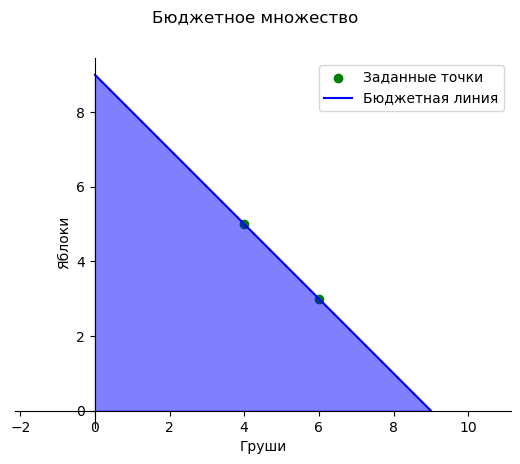

In [224]:
def plot_goods_parameters1(list_of_points):

    fig, ax = plt.subplots() # Создаем фигуру

    list_of_points = np.array(list_of_points)
    x_values = list_of_points.T[0]
    y_values = list_of_points.T[1]
    ax.scatter(x_values, y_values, label="Заданные точки", color="green")
            
    ax.axis('equal') # Принудительно делаем оси равными

    result = get_goods_parameters1(list_of_points)
    if not (result is None):
        fig.suptitle("Бюджетное множество")
        g1 = Good1("Груши", result[0][0])
        g2 = Good1("Яблоки", result[1][0])
        budget = 1
        x_points = [0, budget/g1.price] 
        y_points = [budget/g2.price, 0]
        
        ax.plot(x_points, y_points, label="Бюджетная линия", color="blue") # Строим прямую по двум точкам
        ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5, color="blue") # Заливаем область под графиком с прозрачностью (alpha) 0.5
       
         # Добавляем название осей
        ax.set_xlabel(g1.name)
        ax.set_ylabel(g2.name)

        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_visible(False)

    else:
        fig.suptitle("Модель не предусматривает решения")

    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show()



list_of_points = [
    [4,5],
    [6,3]
]
plot_goods_parameters1(list_of_points)

### Интерактивное представление

In [225]:
# Интерактивный виджет
def interactive_plot1(x11, x12, x21, x22):
    list_of_points = [
        [x11, x12],
        [x21, x22]
    ]
    plot_goods_parameters1(list_of_points);

interact(interactive_plot1, x11=(1, 10), x12 = (1, 10), x21=(1, 10), x22 = (1, 10));

interactive(children=(IntSlider(value=5, description='x11', max=10, min=1), IntSlider(value=5, description='x1…

### Случай трех товаров

Отметим, что рассуждения и код практически не поменяются, если речь пойдет о трех товарах и трех точках в трехмерном пространстве.

Пусть нам даны три точки $A_1 = (a_{1,1}, a_{1,2}, a_{1,3})$, $A_2 = (a_{2,1}, a_{2,2}, a_{2,3})$ и $A_3 = (a_{3,1}, a_{3,2}, a_{3,3})$. Надо решить систему линейных уравнений:

$$
\begin{cases}
p_1 a_{1,1} + p_2 a_{1,2} + p_3 a_{1,3}= 1\\
p_1 a_{2,1} + p_2 a_{2,2} + p_3 a_{2,3}= 1\\
p_1 a_{3,1} + p_2 a_{3,2} + p_3 a_{3,3}= 1\\
\end{cases}
$$

Перепишем в матричном виде:
$$
\begin{pmatrix}
    a_{1,1} & a_{1,2} & a_{1,3}\\
    a_{2,1} & a_{2,2} & a_{2,3}\\
    a_{3,1} & a_{3,2} & a_{3,3}\\
\end{pmatrix}
\begin{pmatrix}
        p_1 \\
        p_2 \\
        p_3
\end{pmatrix}
= 
\begin{pmatrix}
        1 \\
        1 \\
        1
\end{pmatrix}
$$

Решением является: 
$$
\begin{pmatrix}
        p_1 \\
        p_2 \\
        p_3
\end{pmatrix}
=
\begin{pmatrix}
    a_{1,1} & a_{1,2} & a_{1,3}\\
    a_{2,1} & a_{2,2} & a_{2,3}\\
    a_{3,1} & a_{3,2} & a_{3,3}\\
\end{pmatrix}^{-1}
\begin{pmatrix}
        1 \\
        1 \\
        1
\end{pmatrix}
$$

In [226]:
def get_goods_parameters1(list_of_points):
    '''
        list_of_points -- двумерный массив
        list_of_points = [
            [a11, a12],
            [a21, a22],
        ]

        Функция возвращает список цен, если задача имеет решение, и None, если не имеет
    '''
    
    ones = np.ones([3,1]) # единственное изменение тут

    if np.linalg.det(list_of_points) != 0:
        solution = np.linalg.inv(list_of_points) @ ones
    else:
        return None

    p_min = min(solution)
    if is_equal(p_min, 0) or p_min < 0:
        return None
    else:
        return solution

list_of_points = [
    [0,0,1],
    [0,1,0],
    [1,0,0],
]
print(get_goods_parameters1(list_of_points))

list_of_points = [
    [0,0,1],
    [0,1,1],
    [1,0,0],
]
print(get_goods_parameters1(list_of_points))

[[1.]
 [1.]
 [1.]]
None


### Случай $n$ товаров. <font color="red">Задание 1.</font> <a id="task_1"></a>

Реализуйте предыдущий пример для случая $n$ товаров. Вам надо написать поясняющий текст, используя $\LaTeX$, а также реализовать саму функцию.

**Пояснение**

Если мы пишем функцию для общего лучая, то нам заранее не известно количество товаров (т.е. конкретное значение числа n). Значит, нам нужно достать эту информацию из входных данных, т.е. из list_of_points. Знаем, что это квадратная матрица размера $n \times n$, где $n$ - размерность рассматриваемого пространства = количество точек = количество товаров. Поэтому нам потребуется изменить размерность столбца единиц, в котором мы указываем бюджет - теперь он размера $n\times 1$ - и это единственное изменение.

In [227]:
def get_goods_parameters1(list_of_points: np.array):
    n = len(list_of_points)
    ones = np.ones([n,1]) # Единственное изменение тут

    if np.linalg.det(list_of_points) != 0:
        solution = np.linalg.inv(list_of_points) @ ones
    else:
        return None

    p_min = min(solution)
    if is_equal(p_min, 0) or p_min < 0:
        return None
    else:
        return solution
    return 

list_of_points = np.eye(10) # Единичная матрица
print(get_goods_parameters1(list_of_points))

list_of_points = [
    [0,0,1],
    [0,1,1],
    [1,0,0],
]
print(get_goods_parameters1(list_of_points))

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
None


## Кривые безразличия

### Параметры функции полезности Кобба-Дугласа

Напишем функцию, которая будет строить графики кривых безразличия функции полезности Кобба-Дугласа вида
$$c = x^{\alpha}y^{1-\alpha}$$
при различных значениях параметров $c$ и $\alpha$.

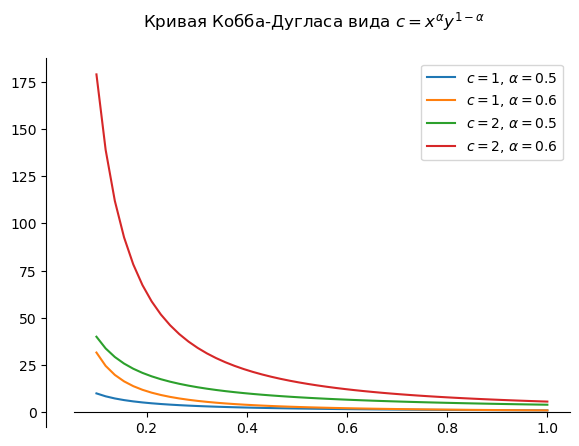

In [228]:
def Cobb_Douglas1(x, c=1, alpha=0.9):
    # Выразим в явном виде y как функцию от x
    return math.pow(x, -alpha/(1-alpha))*math.pow(c, 1/(1-alpha))

def plot_Cobb_Douglas1(c_values, alpha_values):
    x_values = np.linspace(0.1, 1) # Массив из 50 точек от 0.1 до 1

    fig, ax = plt.subplots()
    fig.suptitle("Кривая Кобба-Дугласа вида $c = x^{\\alpha}y^{1-\\alpha}$") # Двойные слеши нужны, чтобы не экранировать следующий символ
    
    for c in c_values:
        for alpha in alpha_values:
            y_values = [Cobb_Douglas1(x, c, alpha) for x in x_values]    
            ax.plot(x_values, y_values, label=f"$с = {c}$, $\\alpha = {alpha} $")
    

    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.legend()
    

c_values = [1, 2]
alpha_values = [0.5, 0.6]
plot_Cobb_Douglas1(c_values, alpha_values)

### Поиск и визуализация оптимального решения для функции Кобба-Дугласса

Напишем функцию, которая по информации о двух товарах, бюджете и параметре $\alpha$ функции полезности Кобба-Дугласа найдет оптимальное решение, т.е. точку касания кривой безразличия функции Кобба-Дугласа и границы бюджетного ограничения.

Известно, что решение можно найти по формуле:
$$
\begin{cases}
x_1 = \frac{\alpha}{g1.price}\\
x_2 = \frac{1-\alpha}{g2.price}\\
\end{cases}
$$

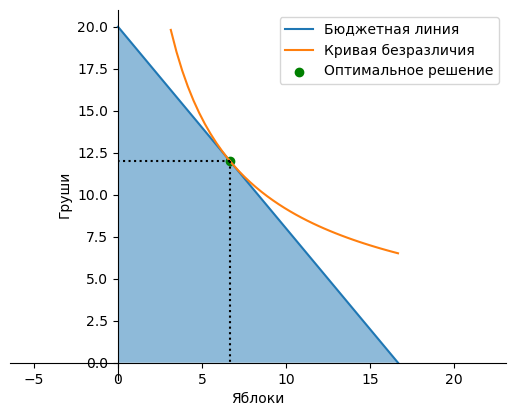

In [232]:
def budget_Cobb_Douglas_solution1(g1, g2, budget, alpha=0.5):
    '''
        При заданных ценах на товары, бюджете и параметре alpha находит оптимальное решение и
        значение выражения x^(alpha) * y^(1-alpha)
    '''
    x_solution = alpha*budget/g1.price
    y_solution = (1-alpha)*budget/g2.price
    return x_solution, y_solution, math.pow(x_solution, alpha)*math.pow(y_solution, 1-alpha)

def plot_budget_Cobb_Douglas1(g1, g2, budget, alpha=0.5):
    x_solution, y_solution, c = budget_Cobb_Douglas_solution1(g1, g2, budget, alpha)
    
    x_points = [0, budget/g1.price]
    y_points = [budget/g2.price, 0]
    fig, ax = plt.subplots()
    ax.plot(x_points, y_points, label="Бюджетная линия")
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5)
    
    x_values = np.linspace(0.1, budget/g1.price)
    y_values = np.array([Cobb_Douglas1(x, c, alpha) for x in x_values])
    filter = y_values < budget/g2.price
    ax.plot(x_values[filter], y_values[filter], label="Кривая безразличия")
    ax.scatter(x_solution, y_solution, label="Оптимальное решение", color='green')
    ax.plot([x_solution, 0], [y_solution, y_solution], 'k:')
    ax.plot([x_solution, x_solution], [y_solution, 0], 'k:')
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal')
    ax.legend()
    plt.show()

g1 = Good1("Яблоки", 6)
g2 = Good1("Груши", 5)
budget = 100 
alpha = 0.4
plot_budget_Cobb_Douglas1(g1, g2, budget, alpha)

### Интерактивная визуализация оптимального решения для функции Кобба-Дугласа

In [233]:
def interactive_plot1(p1, p2, budget, alpha):
    g1 = Good1("Яблоки", p1)
    g2 = Good1("Груши", p2)
    plot_budget_Cobb_Douglas1(g1, g2, budget, alpha);

interact(interactive_plot1, p1=(1, 10), p2 = (1, 10), budget=(1,100), alpha=(0.1,0.9));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

### Параметры функции полезности Леонтьева. <font color="red">Задание 2</font> <a id="task_2"></a>

Напишите код, который визуализирует графики кривых безразличия для функции Леонтьева вида 
$$
с = \min(\frac{x}{a}, \frac{y}{b})
$$
при различных значениях параметров $а$ и $b$.

**Пояснение**

Как мы знаем, каждая кривая безразличия строится для определенного уровня полезности. Поэтому в данном случае нам потребуется самостоятельно создать массив c_values (конкретные значения полезности), поскольку он не задан изначально. То есть каждый график будет построен для какого-то фиксированного уровня полезности, и эти c_values также будут параметром нашей функции.

Леонтьевская полезность - это "уголки": если $U(x, y) = min(\frac{x}{a}, \frac{y}{b}) = c$ то мы рассматриваем две линии - вертикальную $x=ac$ и горизонтальную $y=bc$. Эти линии пересекаются, и нас интересует вертикальная линия выше пересечения и горизонтальная правее пересечения. 

Все точки пересечения (вершины "уголков") лежат на прямой $bx=ay$ (ее мы для удобства проведем черным пунктиром).

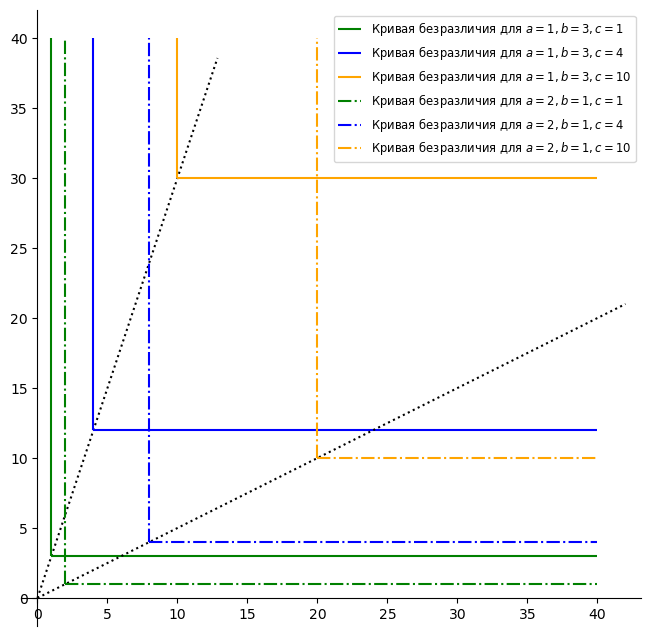

In [234]:
def plot_Leontev1(a_values, b_values, c_values):
    n = len(a_values)
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    colors = ['green', 'blue', 'orange'] #Используем разные цвета для разных уровней полезности
    lines =['-', '-.'] #Используем разные виды линий для разных графиков
    for i in range(0, n):
        x_values = np.linspace(0, 42)
        y_values = np.array([b_values[i]*num/a_values[i] for num in x_values]) #Строим прямую ay=bx
        filter = y_values < 40
        ax.plot(x_values[filter], y_values[filter], ':k')
        
        #Строим кривые безразличия для каждого уровня полезности
        for j in range(len(c_values)):
            #Строим вертиекальную прямую выше пересечения
            ax.vlines(x=a_values[i]*c_values[j], ymin =b_values[i]*c_values[j], ymax=40, color=colors[j], linestyle=lines[i], label=f"Кривая безразличия для $a={a_values[i]}, b={b_values[i]}, c = {c_values[j]}$")
            #Строим горизонтальную прямую правее пересечения
            ax.hlines(y=b_values[i]*c_values[j], xmin = a_values[i]*c_values[j], xmax=40, color=colors[j], linestyle=lines[i])
    
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal')
    ax.legend(loc='upper right', fontsize='small')
    plt.show()
               

a_values = [1, 2]
b_values = [3, 1]
c_values = [1, 4, 10]
plot_Leontev1(a_values, b_values, c_values)

### Поиск и визуализация оптимального решения для функции полезности Леонтьева. <font color="red">Задание 3</font> <a id="task_3"></a>

Для двух заданных товаров $g1$, $g2$, величины бюджета $budget$, а также параметров $a$ и $b$ функции полезности Леонтьева, найдите оптимальное решение и визуализируйте его.

**Пояснение**

Знаем, что оптимальная точка в случае полезности Леонтьева - это вершина "уголка" (т.к. она минимизирует затраты на товары при фиксированном уровне полезности), поэтому в оптимуме выполняется $ay=bx$. 

При этом мы хотим получить максимальную полезность, т.е. найти наиболее далекое пересечение нашей кривой безразлии с бюджетным множеством. Это происходит, когда вершина "уголка" оказывается ровно на бюджетной линии. Значит, в оптимуме выполняется $g1.price*x + g2.price*y=budget$.

Имеем систему из 2 уравнений. Выражаем у из первого и подставляем во второе, получаем: $g1.price*x + \frac{g2.price*b}{a}*x = budget \implies x = \frac{budget}{g1.price+\frac{g2.price*b}{a}} (*)$

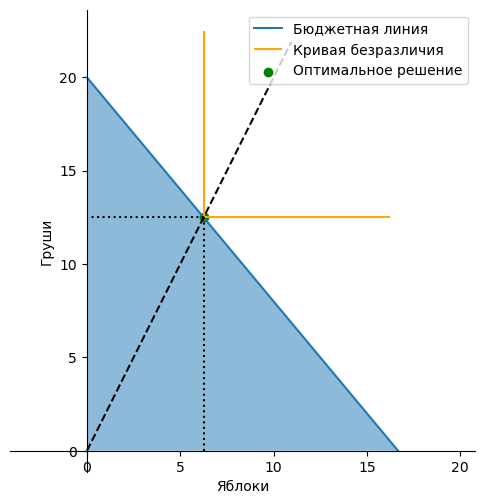

In [235]:
def budget_Leontev_solution1(g1, g2, budget, a, b):
    x_solution = budget/(g1.price + g2.price*b/a) #(*)
    y_solution = b*x_solution/a 
    c = x_solution/a #Т.к. c=min(x/a, y/b)
    return x_solution, y_solution, c

def plot_budget_Leontev1(g1, g2, budget, a, b):
    x_solution, y_solution, c = budget_Leontev_solution1(g1, g2, budget, a, b)
    
    #Строим бюджетную линию
    x_points = [0, budget/g1.price]
    y_points = [budget/g2.price, 0]
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.plot(x_points, y_points, label="Бюджетная линия")
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5)
    
    #Строим прямую ау=вх
    x_values = np.linspace(0, a*c+10)
    y_values = np.array([b*num/a for num in x_values])
    filter = y_values < b*c+10
    ax.plot(x_values[filter], y_values[filter], '--k')
    
    #Строим кривую безразличия, соответствующую найденному уровню полезности
    ax.vlines(x=a*c, ymin =b*c, ymax=b*c+10, color='orange', label="Кривая безразличия")
    ax.hlines(y=b*c, xmin = a*c, xmax=a*c+10, color='orange')
    
    ax.scatter(x_solution, y_solution, label="Оптимальное решение", color='green')
    ax.plot([x_solution, 0], [y_solution, y_solution], 'k:')
    ax.plot([x_solution, x_solution], [y_solution, 0], 'k:')
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)
    
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal')
    ax.legend(loc='upper right')
    plt.show()

g1 = Good1("Яблоки", 6)
g2 = Good1("Груши", 5)
budget = 100 
a = 1
b = 2
plot_budget_Leontev1(g1, g2, budget, a, b)

### Интерактивная визуализация оптимального решения для функции полезности Леонтьева

In [237]:
def interactive_plot1(p1, p2, budget, a, b):
    g1 = Good1("Яблоки", p1)
    g2 = Good1("Груши", p2)
    plot_budget_Leontev1(g1, g2, budget, a, b);

interact(interactive_plot1, p1=(1, 10), p2 = (1, 10), budget=(1,100), a=(1,10), b=(1,10));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

# Модель 2

## Описание класса

В данной модели у каждого товара есть три параметра: название, цена и количество такого товара, которое можно получить бесплатно.
Это означает, что потребитель всегда может получить бесплатно товар в заданном количестве, а за каждую следующую единицу товара необходимо заплатить указанную цену.

In [238]:
class Good2():
    def __init__(self, name, price, free):
        self.name = name
        self.price = price
        self.free = free # Количество продукта, которое можно получить бесплатно

## Проверка бюджетного ограничения. <font color="red">Задание 4</font><a id="task_4"></a>

Напишем функцию, которая проверит, удовлетворяет ли конкретная точка бюджетным ограничениям.

**Пояснение**

Поскольку агент может получить некоторое количесто обоих благ бесплатно, мы из проверяемой точки доджны сначала вычесть эти количества (потому что агент за них не платит), и только потом получившиеся количества домножать на соответствующие цены.  

In [239]:
def budget_test2(g1: Good2, g2: Good2, budget, x1=0, x2=0):
    result = (x1-g1.free)*g1.price + (x2-g2.free)*g2.price
    if (is_equal(result, budget)): # Поскольку значения типа float, необходимо сравнивать на равенство с погрешностью
        return 0
    elif (result < budget):
        return 1
    else:
        return -1


g1 = Good2("Яблоки", 10, 1)
g2 = Good2("Груши", 10, 1)
budget = 100
print(budget_test2(g1, g2, budget, 5, 6))
print(budget_test2(g1, g2, budget, 6, 6))
print(budget_test2(g1, g2, budget, 6, 7))

1
0
-1


## Графическое представление. <font color="red">Задание 5.</font> <a id="task_5"></a>

Напишите функцию, которая будет изображать бюджетное множество и проверяемую точку.

**Пояснение**

Поскольку агент может получить некоторое количество обоих благ бесплатно, мы изначально находимся в точке $(g1.free, g2.free)$. Можно представить, что агент может продать этот начальный запас по рыночным ценам и добавить эту выручку в свой доход. Поэтому его бюджетное ограничение примет вид: $g1.price*x + g2.price * y = budget + g1.price*g1.free + g2.price*g2.free (*)$.

Однако максимально доступное количество первого блага равно $g1.free + \frac{budget}{g1.price}$ (количество, которое мы получим, потратив весь бюджет на первое благо + количество первого блага, которое можем получить бесплатно), максимальное количество второго блага равно $g2.free+ \frac{budget}{g2.price}$. 

Поэтому бюджетное множество - это площадь под треугольником (*), ограниченная вертикальной и горизонтальной линиями: $x = g1.free + \frac{budget}{g1.price}, y = g2.free+ \frac{budget}{g2.price}$.

При этом точки на горизонтальной и вертикальной лини и доступны нам, потому что нам не обязательно использовать все бесплатные блага, а можно взять только их часть. 

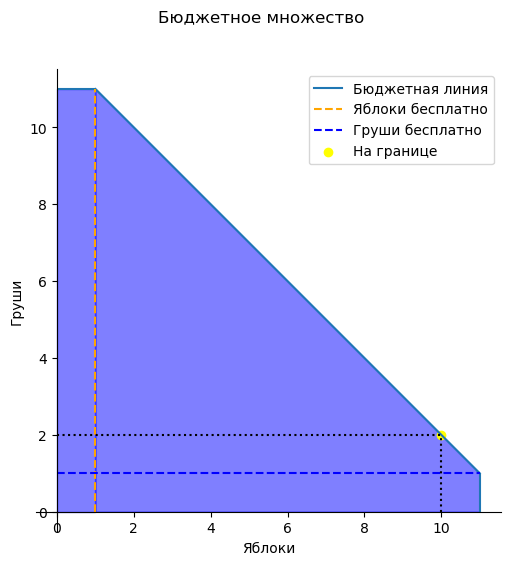

In [240]:
def plot_budget2(g1: Good2, g2: Good2, budget, x, y):
    
    #Строим наклонную часть бюджетной линии
    x_points = [g1.free, budget/g1.price+g1.free] 
    y_points = [budget/g2.price+g2.free, g2.free]
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    fig.suptitle("Бюджетное множество")
    
    #Строим вертикальную и горизонтальную линии, ограничивающие бюджетное множество
    ax.plot(x_points, y_points, label="Бюджетная линия")
    ax.vlines(x=budget/g1.price+g1.free, ymin =0, ymax=g2.free)
    ax.hlines(y=budget/g2.price+g2.free, xmin =0, xmax=g1.free)
    
    #Заливаем область под графиком
    horiz_y = [budget/g2.price+g2.free, budget/g2.price+g2.free]
    horiz_x = [0, g1.free]
    ax.fill_between(horiz_x, horiz_y, np.zeros_like(x_points), color='blue', alpha=0.5)
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), color='blue', alpha=0.5)
    
    #Строим вспомогательные линии к точкам излома бюджетной линии
    ax.vlines(x=g1.free, ymin=0, ymax=budget/g2.price+g2.free, label="Яблоки бесплатно", color = 'orange', linestyle='--')
    ax.hlines(y=g2.free, xmin=0, xmax=budget/g1.price+g1.free, label="Груши бесплатно", color = 'blue', linestyle='--')
    
    point_status = budget_test2(g1, g2, budget, x, y)
    if point_status == 1:
        point_color = "green"
        point_label = "Допустимо"
    elif point_status == 0:
        point_color = "yellow"
        point_label = "На границе"
    else: 
        point_color = "red"
        point_label = "Недопустимо"
    
    ax.scatter(x, y, color=point_color, label=point_label) 
    ax.plot([x, x], [0, y], 'k:')
    ax.plot([0, x], [y, y], 'k:')
    
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    
    ax.axis('equal') 
    plt.legend(loc='upper right')
    plt.show() 
    
g1 = Good2("Яблоки", 10, 1)
g2 = Good2("Груши", 10, 1)
budget = 100
plot_budget2(g1, g2, budget, 10, 2)

## Интерактивное представление

In [242]:
def interactive_plot2(p1, f1, p2, f2, budget, x, y):
    g1 = Good2("Яблоки", p1, f1)
    g2 = Good2("Груши", p2, f2)
    plot_budget2(g1, g2, budget, x, y);

interact(interactive_plot2, p1=(1, 10), f1=(0, 10), p2 = (1, 10), f2=(0,10), budget=(1,100), x=(0,10), y=(0,10))

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='f1'…

<function __main__.interactive_plot2(p1, f1, p2, f2, budget, x, y)>

## Работа с таблицами. <font color="red">Задание 6</font><a id="task_7"></a>

Выполните аналогичные действия, как и с моделью 1, а именно:
* Создайте файл model2_data.xlsx по аналогии с тем, как устроен файл model1_data.xlsx. И добавьте в него как минимум 10 строчек.
* Загрузите данные из таблицы model2_data.xlsx
* Для каждой записи проверьте, выполнено ли бюджетное ограничение.
* Отфильтруйте только те варианты, в которых бюджетное ограничение выполняется (в том числе и на границе).
* Отсортируйте таблицу по столбцу G1_free.
* Результат сохраните в файл model2_result.xlsx

Допускается в этом задании вместо Excel файлов использовать csv файлы.

In [243]:
df = pd.read_excel("model2_data.xlsx") 
df 

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,G1_free,G2_free
0,Яблоки,5,Груши,7,80,12,1,1,0
1,Яблоки,8,Груши,3,75,4,10,9,4
2,Апельсины,1,Мандарины,4,78,5,5,2,2
3,Виноград,2,Малина,5,44,10,45,4,3
4,Виноград,7,Малина,5,30,6,8,2,5
5,Виноград,5,Малина,3,62,8,22,5,0
6,Груши,5,Виноград,8,50,5,6,5,4
7,Яблоки,2,Виноград,9,71,17,3,0,6
8,Апельсины,9,Груши,5,49,12,5,3,1
9,Виноград,2,Яблоки,6,29,4,2,4,2


In [244]:
result = []
for index, row in df.iterrows(): 
    #Создаем товары по 3 параметрам
    g1 = Good2(row['G1_name'], row['G1_price'], row['G1_free']) 
    g2 = Good2(row['G2_name'], row['G2_price'], row['G2_free'])

    #Проверяем точки на попадание в бюджетное множество с помощью ранее написанной фунцкии
    result.append(budget_test2(g1, g2, row['Budget'], row['G1_quant'], row['G2_quant']))

df["Result"] = result 
df

#Сортируем результаты так, чтобы остались только точки внутри и на границе бюджетного множества
df_super = df[df["Result"] >= 0]
df_super

#Сортируем оставшиеся точки по g1.free
df_super = df_super.sort_values(by = 'G1_free')
df_super

#Сохраняем обработанную таблицу в файл
df_super.to_excel("model2_result.xlsx") 

## Обратная задача. <font color="red">Задание 7</font> <a id="task_7"></a>

Пусть нам даны четыре точки $A_1 = (a_{1,1}, a_{1,2})$, $A_2 = (a_{2,1}, a_{2,2})$, $A_3 = (a_{3,1}, a_{3,2})$ и $A_4 = (a_{4,1}, a_{4,2})$. Необходимо определить, существуют ли параметры Модели 2, т.е. значения __price >0__ и __free >= 0__ для двух товаров такие, чтобы граница бюджетной линии содержала указанные точки. Если такие параметры существуют для рассматриваемой модели, то необходимо вывести параметры модели и изобразить ее бюджетное ограничение. Если таких параметров не существует, то необходимо вывести сообщение об этом.

Реализуйте графический интерактивный интерфейс, визуализирующий решение данной задачи, по аналогии с тем, как это сделано для Модели 1.

**Пояснение**

Заметим, что в данном случае для существования параметров, прежде всего, необходимо, чтобы при возрастании абсцисс координат их ординаты убывали (т.е. чтобы точки вместе с осями Ох, Оу образовывали подобие треугольника - возможно, "выпуклого"). В противном случае:
 - если одна точка находится ровно выше/ниже другой или ровно правее/левее другой, 
 - если одна/несколько точек находятся внутри треугольника, условно образуемого другими точками вместе с осями,  
 подходящих параметров не существует.
 
(Далее я буду говорить первая/вторая/и т.д. точка, подразумевая "первая по величине абсциссы точка" (т.е. точка с самой маленькой абсциссой) и т.д.)
 
Если наши точки удовлетворяют этому условию, мы берем вторую и третью из них и проводим через них наклонную прямую. А через первую и четвертую точки проводим вертикальную и горизонтальную прямые.
 
При этом цены мы найдем из решения матричного уравнения для наклонной прямой, а $g1.free, g2.free$ - из координат "крайних" точек и точек излома бюджетной линии.

Заметим, что первая и четвертая точки могут попадать на наклонную прямую, тогда это будет означать что количество бесплатного первого и второго блага равны 0 соответственно.

In [245]:
def get_goods_parameters2(points):
    #Проверяем, что при не убывании абсцисс точек их ординаты не возрастают
    points.sort(key = lambda x: x[0])
    for i in range(0, 3):
        for i in range(0, 3):
            if points[i][0]==points[i+1][0] and points[i][1]<points[i+1][1]:
                points[i], points[i+1] = points[i+1], points[i]
    if (not(points[0][1]>=points[1][1]>=points[2][1]>=points[3][1])):
        return None
    
    #Берем вторую и третью точки 
    listt = [points[1], points[2]]
    ones = np.ones([2,1]) 
    
    #Находим через них цены
    if np.linalg.det(listt) != 0:
        solution = np.linalg.inv(listt) @ ones
    else:
        return None

    p_min = min(solution)
    if is_equal(p_min, 0) or p_min < 0:
        return None
    p1 = solution[0][0]
    p2 = solution[1][0] 
    
    #Если первая точка попала на наклонную прямую, а четвертая - в область под ней
    if (is_equal(points[0][0]*p1+points[0][1]*p2, 1) and points[3][0]*p1+points[3][1]*p2<1):
        free1 = 0
        free2 = (1-p1*points[3][0])/p2
        if is_equal(free2, 0) or free2>0:
            result = np.array([p1, p2, free1, free2])
            return result 
        else:
            return None
    
    #Если четвертая точка попала на наклонную прямую, а первая - в область под ней
    elif (points[0][0]*p1+points[0][1]*p2<1 and is_equal(points[3][0]*p1+points[3][1]*p2, 1)):
        free1 = (1-p2*points[0][1])/p1
        free2 = 0
        if is_equal(free1, 0) or free1>0:
            result = np.array([p1, p2, free1, free2])
            return result 
        else:
            return None
        
    #Если первая и четвертая точки попали на наклонную прямую    
    elif (is_equal(points[0][0]*p1+points[0][1]*p2, 1) and is_equal(points[3][0]*p1+points[3][1]*p2, 1)):
        free1 = 0
        free2 = 0
        result = np.array([p1, p2, free1, free2])
        return result 
    
    #Если первая и четвертая точки попали под наклонную прямую
    elif (points[0][0]*p1+points[0][1]*p2<1 and points[3][0]*p1+points[3][1]*p2<1):
        free1 = (1-p2*points[0][1])/p1
        free2 = (1-p1*points[3][0])/p2
        if (is_equal(free1, 0) or free1>0) and (is_equal(free2, 0) or free2>0):
            result = np.array([p1, p2, free1, free2])
            return result
        else:
            return None
    
    #Если первая или четвертая точки лежат выше наклонной прямой, подходящие параметры подобрать невозможно
    else:
        return None
             
list_of_points=[[2, 9], [3, 8], [4, 7], [5, 6]]    
print(get_goods_parameters2(list_of_points))

[0.09090909 0.09090909 0.         0.        ]


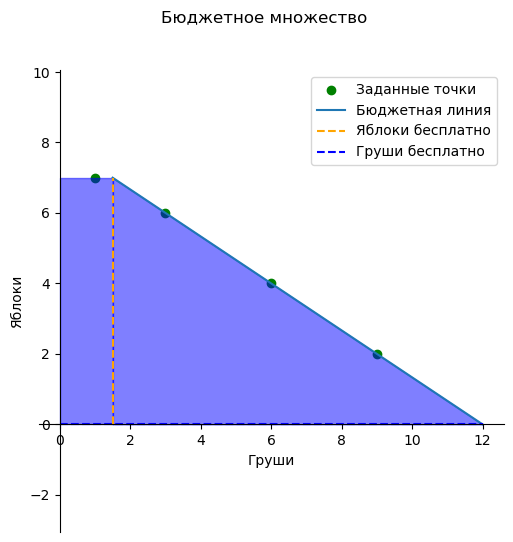

In [246]:
def plot_goods_parameters2(points):
    
    result = get_goods_parameters2(points)
    
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    points = np.array(points)
    
    x_values = points.T[0]
    y_values = points.T[1]
    
    ax.scatter(x_values, y_values, label="Заданные точки", color="green")   
    ax.axis('equal') 
    
    if not (result is None):
        budget = 1
        fig.suptitle("Бюджетное множество")
        
        #Создадим 2 блага с параметрами, полученными из нашей функции
        g1 = Good2("Груши", result[0], result[2])
        g2 = Good2("Яблоки", result[1], result[3])
        
        #Построим наклонную линию и зальем область под ней
        x_points = [g1.free, (1-g2.free*g2.price)/g1.price] 
        y_points = [(1-g1.free*g1.price)/g2.price, g2.free]
        ax.plot(x_points, y_points, label="Бюджетная линия")
        ax.fill_between(x_points, y_points, np.zeros_like(x_points), color='blue', alpha=0.5)
        
        #Зальем область под горизонтальной линией
        horiz_y = [(1-g1.free*g1.price)/g2.price, (1-g1.free*g1.price)/g2.price]
        horiz_x = [0, g1.free]
        ax.fill_between(horiz_x, horiz_y, np.zeros_like(x_points), color='blue', alpha=0.5)
        
        #Построим вертикальную и горизонтальную линии, ограничивающие бюджетное множество
        ax.vlines(x=g1.free, ymin=0, ymax=(1-g1.free*g1.price)/g2.price, label="Яблоки бесплатно", color = 'orange', linestyle='--')
        ax.hlines(y=g2.free, xmin=0, xmax=(1-g2.free*g2.price)/g1.price, label="Груши бесплатно", color = 'blue', linestyle='--')
       
        ax.set_xlabel(g1.name)
        ax.set_ylabel(g2.name)
        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_visible(False)

    else:
        fig.suptitle("Модель не предусматривает решения")

    ax.legend()
    plt.show()

points = [[1,7], [3,6], [6, 4], [9, 2]]
plot_goods_parameters2(points)

In [248]:
# Интерактивный виджет
def interactive_plot2(x11, x12, x21, x22, x31, x32, x41, x42):
    list_of_points = [[x11, x12], [x21, x22], [x31, x32], [x41, x42]]
    plot_goods_parameters2(list_of_points);

interact(interactive_plot2, x11=(1, 10), x12 = (1, 10), x21=(1, 10), x22 = (1, 10), x31=(1, 10), x32 = (1, 10), x41=(1, 10), x42 = (1, 10));

interactive(children=(IntSlider(value=5, description='x11', max=10, min=1), IntSlider(value=5, description='x1…

## Кривые безразличия. <font color="red">Задание 8</font> <a id="task_8"></a>

Для двух товаров из Модели 2 и кривой безразличия функции Кобба-Дугласа найдите оптимальное решение и визуализируйте его при помощи интерактивного виджета.

Пример работы расположен по [данной ссылке](https://samonenko-econom-practice-example-streamlit-app-yyqr46.streamlit.app/)

Как мы знаем, для полезности Кобба-Дугласа оптимальная точка - это точка касания "самой высокой" (с максимально возможной полезностью) кривой безразличия c бюджетным ограничением. Однако не вся наша бюджетная линия имеет отрицательный наклон, а рассматриваемая функция полезности не может иметь точку касания на вертикальном или горизонтальном участке.  

Поэтому мы сначала ищем точку касания кривой безразличия и наклонного участка и проверяем, попалает ли она в ограничения. Если да, то мы нашли оптимум. Если полученный оптимум левее левой точки излома, то на самом деле оптимум находится в этой левой точке излома. Если полученный оптимум правее правой точки излома, то на самом деле оптимум находится в этой правой точке излома. 

При этом, как было сказано ранее, наше бюджетное ограничение имеет вид: $g1.price*x + g2.price*y = budget + g1.price*g1.free + g2.price*g2.free$ при $x\geq g1.threshold, y\geq g2.threshold$

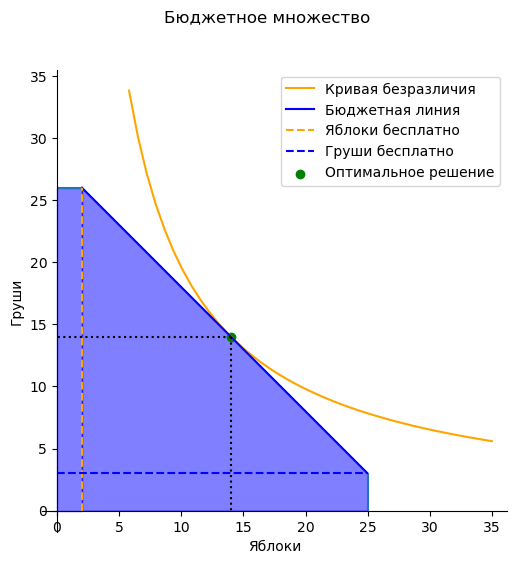

In [249]:
def Cobb_Douglas2(x, c, alpha):
    return math.pow(x, -alpha/(1-alpha))*math.pow(c, 1/(1-alpha))

def budget_Cobb_Douglas_solution2(g1: Good2, g2: Good2, budget, alpha):
    x_solution = alpha*(budget+g1.free*g1.price+g2.free*g2.price)/g1.price 
    #Когда нашли х, у выражаем из бюджетного ограничения
    y_solution = (budget + g1.free*g1.price + g2.free*g2.price - x_solution*g1.price)/g2.price
    
    #Если полученный оптимум правее правого излома, остаемся на этом изломе
    if x_solution>(budget/g1.price + g1.free) or y_solution<g2.free:
        x_solution = budget/g1.price + g1.free
        y_solution = g2.free
    
    #Если полученный оптимум левее левого излома, остаемся на этом изломе
    if y_solution>(budget/g2.price + g2.free) or x_solution<g1.free:
        y_solution = budget/g2.price + g2.free
        x_solution = g1.free
            
    return x_solution, y_solution, math.pow(x_solution, alpha)*math.pow(y_solution, 1-alpha)

def plot_budget_Cobb_Douglas2(g1, g2, budget, alpha):
    x_solution, y_solution, c = budget_Cobb_Douglas_solution2(g1, g2, budget, alpha)
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    fig.suptitle("Бюджетное множество")
    
    #Строим кривую безразличия, соответствующую найденному уровню полезности
    x_values = np.linspace(0.1, budget/g1.price + g1.free+10)
    y_values = np.array([Cobb_Douglas2(x, c, alpha) for x in x_values])
    filter = y_values < budget/g2.price+g2.free+10
    ax.plot(x_values[filter], y_values[filter], label="Кривая безразличия", color = 'orange')
    
    #Строим наклонную часть бюджетного ограничения и заливаем область под ней
    x_points = [g1.free, budget/g1.price+g1.free] 
    y_points = [budget/g2.price+g2.free, g2.free]
    ax.plot(x_points, y_points, label="Бюджетная линия", color='blue')
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), color='blue', alpha=0.5)
    
    #Строим вертикальную и горизонтальную линии, ограничивающие бюджетное множество
    ax.vlines(x=budget/g1.price+g1.free, ymin =0, ymax=g2.free)
    ax.hlines(y=budget/g2.price+g2.free, xmin =0, xmax=g1.free)
    
    #Заливаем область под горизонтальной линией
    horiz_y = [budget/g2.price+g2.free, budget/g2.price+g2.free]
    horiz_x = [0, g1.free]
    ax.fill_between(horiz_x, horiz_y, np.zeros_like(x_points), color='blue', alpha=0.5)
    
    #Строим вспомогательные линии к точкам излома бюджетной линии
    ax.vlines(x=g1.free, ymin=0, ymax=budget/g2.price+g2.free, label="Яблоки бесплатно", color = 'orange', linestyle='--')
    ax.hlines(y=g2.free, xmin=0, xmax=budget/g1.price+g1.free, label="Груши бесплатно", color = 'blue', linestyle='--')
    
    ax.scatter(x_solution, y_solution, label="Оптимальное решение", color='green')
    ax.plot([x_solution, 0], [y_solution, y_solution], 'k:')
    ax.plot([x_solution, x_solution], [y_solution, 0], 'k:')
    
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal')
    ax.legend()
    plt.show()

g1 = Good2("Яблоки", 1, 2)
g2 = Good2("Груши", 1, 3)
budget = 23
alpha = 0.5
plot_budget_Cobb_Douglas2(g1, g2, budget, alpha)

In [251]:
def interactive_plot2(p1, p2, f1, f2, budget, alpha):
    g1 = Good2("Яблоки", p1, f1)
    g2 = Good2("Груши", p2, f2)
    plot_budget_Cobb_Douglas2(g1, g2, budget, alpha);

interact(interactive_plot2, p1=(1, 10), p2 = (1, 10), f1 = (0,10), f2=(0,10), budget=(1,200), alpha=(0.1,0.9));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

# Модель 3

## Описание класса. <font color="red">Задание 9</font> <a id="task_9"></a>

В данной модели у каждого товара есть следующие параметры: определено некоторое пороговое значение threshold, а также две цены - $price_1$ и $price_2$. Если количество купленного товара меньше и равна $threshold$, то каждая его единица стоит $price_1$. А каждая единица товара свыше $threshold$ стоит $price_2$.

Например, если $threshold = 3$, $price_1 = 10$ и $price_2 = 5$, то:
* 2 единицы товара стоят 20,
* 3 единицы товара стоят 30,
* 4 единицы товара стоят 35,
* 5 единиц товара стоят 40.

Создайте класс Good для товаров данной модели. Реализуйте в классе метод price(quantity), который будет находить стоимость x товаров данного вида. Реализуйте в классе метод quantity(budget), который будет находить какое количество данного товара можно приобрести за стоимость budget.

**Здесь и далее: порог = threshold**

In [2]:
# Создадим класс для товаров модели
class Good3():
    def __init__(self, name, price1, price2, threshold):
        self.name = name
        self.price1 = price1
        self.price2 = price2
        self.threshold = threshold
    
    def price(self, quantity):
        #Если покупаем меньше порога, то платим только по первой цене
        if quantity<=self.threshold:
            return quantity*self.price1
        #Если покупаем больше порога, то за порог платим по первой цене, а за все, что свыше, - по второй
        else:
            return self.threshold*self.price1 + (quantity-self.threshold)*self.price2
        
    def quantity(self, budget):
        #Если стоимость порога не меньше бюджета, то на весь бюджет мы купим не больше порога и только по первой цене
        if self.threshold*self.price1>=budget:
            return budget/self.price1
        #Иначе мы вычитаем из бюджета стоимость порога и на оставшиеся деньги докупаем товар уже по второй цене
        else:
            return self.threshold + (budget-self.threshold*self.price1)/self.price2

In [3]:
g1 = Good3("Яблоки", 10, 5, 3)
print(g1.price(20))
print(g1.quantity(100))

115
17.0


## Бюджетное ограничение. <font color="red">Задание 10</font> <a id="task_10"></a>

Напишем функцию, которая проверит удовлетворяет ли конкретная точка бюджетным ограничениям.

In [4]:
#Здесь нам нужно перебрать несколько случаев

def budget_test3(g1: Good3, g2: Good3, budget, x1=0, x2=0):
    #Находим максимальные значния по х и у; им будут соответствовать нули по у и х (уравнения (3) и (2))
    x_max = (budget - g1.threshold*g1.price1+g1.price2*g1.threshold)/g1.price2
    y_max = (budget - g2.threshold*g2.price1+g2.price2*g2.threshold)/g2.price2
    
    #Находим точки излома (уравнение (4))
    x_mid2 =(budget - g1.threshold*g1.price1+g1.price2*g1.threshold - g2.threshold*g2.price1)/g1.price2
    y_mid2 =g2.threshold
    x_mid1 = g1.threshold
    y_mid1 = (budget - g2.threshold*g2.price1+g2.price2*g2.threshold - g1.threshold*g1.price1)/g2.price2
    
    #Находим точки излома (уравнение (1))
    x_in1 =g1.threshold
    y_in1 =(budget - g1.threshold*g1.price1)/g2.price1
    x_in2 =(budget-g2.threshold*g2.price1)/g1.price1
    y_in2 = g2.threshold
    
    if g1.price1*g1.threshold+g2.price1*g2.threshold<budget:
        listt = list([(x_max, 0), (x_mid1, y_mid1),  (x_mid2, y_mid2), (0, y_max)])
    else:
        listt = list([(x_max, 0), (x_in1, y_in1), (x_in2, y_in2), (0, y_max)])
       
    listt.sort(key=lambda x: x[0])
    
    #Для удобства назовем точки F, B, C, D
    
    xA = listt[0][0]
    yA = listt[0][1]
    xB = listt[1][0]
    yB= listt[1][1]
    xC = listt[2][0]
    yC = listt[2][1]
    xD= listt[3][0]
    yD = listt[3][1]
    
    #Метод, который я буду использовать дальше (нахождение уравнения прямой по 2 точкам - формула (**)), подробно описан в задании 12 
    #Нижний участок БО образован точками C, D
    #Средний участок БО образован точками B, C
    #Верхний участок БО образован точками A, B
    
    #Если оба товара не больше порогов или оба больше порогов, то мы рассматриваем средний участок БО
    if ((x1<=g1.threshold and x2<=g2.threshold) or (x1>g1.threshold and x2>g2.threshold)):
        if (is_equal((yB-yC)*x1+(xC-xB)*x2, xC*yB-xB*yC)):
            return 0
        elif ((yB-yC)*x1+(xC-xB)*x2<xC*yB-xB*yC):
            return 1
        else:
            return -1
        
    #Если х1 не больше порога, а х2 больше, то мы рассматриваем верхний участок БО
    elif (x1<=g1.threshold and x2>g2.threshold):
        if (is_equal((yA-yB)*x1+(xB-xA)*x2, xB*yA-xA*yB)):
            return 0
        elif ((yA-yB)*x1+(xB-xA)*x2<xB*yA-xA*yB):
            return 1
        else:
            return -1
    
    #Если х1 больше порога, а х2 не больше, то мы рассматриваем нижний участок БО
    elif (x1>g1.threshold and x2<=g2.threshold):
        if (is_equal((yC-yD)*x1+(xD-xC)*x2, xD*yC-xC*yD)):
            return 0
        elif ((yC-yD)*x1+(xD-xC)*x2<xD*yC-xC*yD):
            return 1
        else:
            return -1
        
g1 = Good3("Яблоки", 5, 10, 3)
g2 = Good3("Груши", 3, 8, 3)
budget = 86
print(budget_test3(g1, g2, budget, 5, 6))
print(budget_test3(g1, g2, budget, 6, 6))
print(budget_test3(g1, g2, budget, 6, 7))

1
1
0


## Графическое и интерактивное представление. <font color="red">Задание 11.</font> <a id="task_11"></a>

Напишите функцию, которая будет визуализировать бюджетное множество и проверяемую точку, а также по аналогии с предыдущими примерами реализуйте интерактивное представление.

**Пояснение**

Обозначим для краткости: $p^x_1 = g1.price1, p^x_2 = g1.price2, p^y_1 = g2.price1, p^y_2 = g2.price2, budget = I, th_1 = g1.threshold, th_2 = g2.threshold$

Тогда бюджетное множество можно переписать как следующую систему:

\begin{cases}
    p^x_1*x + p^y_1*y \leq I, \text{$x\leq th_1, y\leq th_2$}\\
    p^x_1*x + p^y_2*(y-th_2) \leq I - p^y_1*th_2, \text{$x\leq th_1, y> th_2$}\\
    p^x_2*(x-th_1) + p^y_1*y \leq I - p^x_1*th_1, \text{$x> th_1, y\leq th_2$} \\
    p^x_2*(x-th_1) + p^y_2*(y-th_2) \leq I-p^x_1*th_1 - p^y_1*th_2, \text{$x> th_1, y> th_2$}
\end{cases}

Перенесем некоторые слагаемые слева направо:
\begin{cases}
    (1): p^x_1*x + p^y_1*y \leq I, \text{$x\leq th_1, y\leq th_2$}\\
    (2): p^x_1*x + p^y_2*y \leq I + th_2*(p^y_2-p^y_1), \text{$x\leq th_1, y> th_2$}\\
    (3): p^x_2*x + p^y_1*y \leq I + th_1*(p^x_2 - p^x_1), \text{$x> th_1, y\leq th_2$} \\
    (4): p^x_2*x + p^y_2*y \leq I+th_1(p^x_2-p^x_1)+th_2*(p^y_2-p^y_1), \text{$x> th_1, y> th_2$}
\end{cases}

Здесь (1) и (4) - это "средние" участки графика, (2) - верхний участок, (3) - нижний участок.

Из (3): $x_{max} = \frac{I + th_1*(p^x_2 - p^x_1)}{p^x_2}$

Из (2): $y_{max} = \frac{I + th_2*(p^y_2-p^y_1)}{p^y_2}$

Также понятно, что изломы бюджетной линии будут в точках, в которых:

$x=th_1 \implies y= \frac{I+th_1(p^x_2-p^x_1)+th_2*(p^y_2-p^y_1)-p^x_2*th_1}{p^y_2}$

$y=th_2 \implies x= \frac{I+th_1(p^x_2-p^x_1)+th_2*(p^y_2-p^y_1)-p^y_2*th_2}{p^x_2}$

Также посчитаем точки для прямой, задаваемой уравнением (1):

$x=th_1 \implies y=\frac{I-p^x_1*th_1}{p^y_1}$

$y=th_2 \implies x=\frac{I-p^y_1*th_2}{p^x_1}$

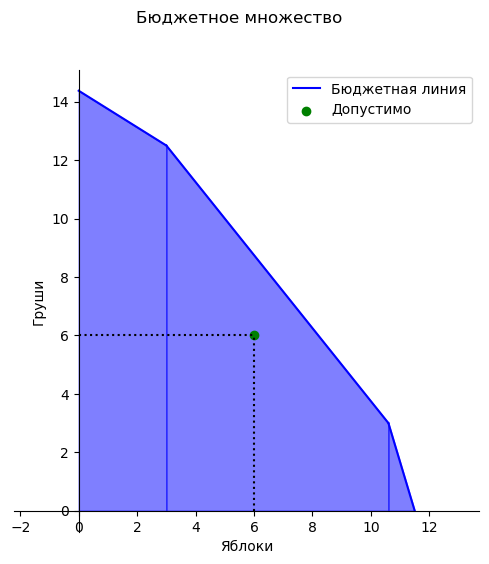

In [5]:
def plot_budget3(g1: Good3, g2: Good3, budget, x=0, y=0):
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    fig.suptitle("Бюджетное множество")
    
    #Находим максимальные значния по х и у; им будут соответствовать нули по у и х (уравнения (3) и (2))
    x_max = (budget - g1.threshold*g1.price1+g1.price2*g1.threshold)/g1.price2
    y_max = (budget - g2.threshold*g2.price1+g2.price2*g2.threshold)/g2.price2
    
    #Находим точки излома (уравнение (4))
    x_mid2 =(budget - g1.threshold*g1.price1+g1.price2*g1.threshold - g2.threshold*g2.price1)/g1.price2
    y_mid2 =g2.threshold
    x_mid1 = g1.threshold
    y_mid1 = (budget - g2.threshold*g2.price1+g2.price2*g2.threshold - g1.threshold*g1.price1)/g2.price2
    
    #Находим точки излома (уравнение (1))
    x_in1 =g1.threshold
    y_in1 =(budget - g1.threshold*g1.price1)/g2.price1
    x_in2 =(budget-g2.threshold*g2.price1)/g1.price1
    y_in2 = g2.threshold
    
    if g1.price1*g1.threshold+g2.price1*g2.threshold<budget:
        listt = list([(x_max, 0), (x_mid1, y_mid1),  (x_mid2, y_mid2), (0, y_max)])
    else:
        listt = list([(x_max, 0), (x_in1, y_in1), (x_in2, y_in2), (0, y_max)])
       
    listt.sort(key=lambda x: x[0])
    
    #Нижний участок БО
    x_points1 = [listt[2][0], listt[3][0]] 
    y_points1 = [listt[2][1], listt[3][1]]
    
    #Средний участок БО
    x_points2 = [listt[1][0], listt[2][0]] 
    y_points2 = [listt[1][1], listt[2][1]]
    
    #Верхний участок БО
    x_points3 = [listt[0][0], listt[1][0]] 
    y_points3 = [listt[0][1], listt[1][1]] 
    
    #Строим все участки бюджетного ограничения и заливаем области под ними
    ax.plot(x_points1, y_points1, label="Бюджетная линия", color='blue')
    ax.fill_between(x_points1, y_points1, np.zeros_like(x_points1), color='blue', alpha=0.5)
    
    ax.plot(x_points2, y_points2, color='blue')
    ax.fill_between(x_points2, y_points2, np.zeros_like(x_points2), color='blue', alpha=0.5)
    
    ax.plot(x_points3, y_points3, color='blue')
    ax.fill_between(x_points3, y_points3, np.zeros_like(x_points3), color='blue', alpha=0.5)
    
    point_status = budget_test3(g1, g2, budget, x, y)
    if point_status == 1:
        point_color = "green"
        point_label = "Допустимо"
    elif point_status == 0:
        point_color = "yellow"
        point_label = "На границе"
    else: 
        point_color = "red"
        point_label = "Недопустимо"
    
    ax.scatter(x, y, color=point_color, label=point_label)
    ax.plot([x, x], [0, y], 'k:') 
    ax.plot([0, x], [y, y], 'k:') 
    
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal') 
    ax.legend() 
    
    plt.show() 


g1 = Good3("Яблоки", 5, 10, 3)
g2 = Good3("Груши", 3, 8, 3)
#g1 = Good3("Яблоки", 10, 5, 3)
#g2 = Good3("Груши", 6, 4, 5)
budget = 100
plot_budget3(g1, g2, budget, 6, 6)

In [6]:
def interactive_plot3(budget, px_1, px_2, py_1, py_2, th_1, th_2, x, y):
    g1 = Good3("Яблоки", px_1, px_2, th_1)
    g2 = Good3("Груши", py_1, py_2, th_2)
    plot_budget3(g1, g2, budget, x, y);
    plt.show()

interact(interactive_plot3, budget=(1, 200),  x=(1, 10), y=(1, 10), px_1=(1, 10), px_2 = (1, 10), py_1=(1, 10), py_2 = (1, 10), th_1 = (0,10), th_2=(0,10))

interactive(children=(IntSlider(value=100, description='budget', max=200, min=1), IntSlider(value=5, descripti…

<function __main__.interactive_plot3(budget, px_1, px_2, py_1, py_2, th_1, th_2, x, y)>

## Обратная задача. <font color="red">Задание 12</font> <a id="task_12"></a>

Пусть нам даны четыре точки $A_1 = (a_{1,1}, a_{1,2})$, $A_2 = (a_{2,1}, a_{2,2})$, $A_3 = (a_{3,1}, a_{3,2})$ и $A_4 = (a_{4,1}, a_{4,2})$. Необходимо определить, существуют ли параметры Модели 3, т.е. значения __threshold > 0__, __price_1 > 0__ и __price_2 > 0__ для двух товаров такие, чтобы граница бюджетной линии содержала указанные точки. Если такие параметры существуют для рассматриваемой модели, то необходимо вывести параметры модели и изобразить ее бюджетное ограничение. Если таких параметров не существует, то необходимо вывести сообщение об этом.

Реализуйте графический интерактивный интерфейс, визуализирующий решение данной задачи по аналогии с тем, как это сделано для Модели 1.

**Пояснение**

В данном случае нам дано 4 точки, назовем их A, B, C, D ($x_{A}, y_{A}, x_{B}, y_{B}, x_{C}, y_{C}, x_{D}, y_{D}$ - координаты всех точек соответсвенно). Здесь, подобно модели 2, для существования подходящих параметров необходимо, чтобы при (строгом) возрастании абсцисс точек их ординаты (строго) убывали.

Пусть точки уже отсортированы по возрастанию абсцисс (и по убыванию координат соответственно). Пусть B, C - точки излома нашей бюджетной линии, тогда $x_{B}=th_1, y_{C}=th_2$. 

Предположим, что в нашей бюджетной линии 3 различных участка, тогда нам придется строить 3 прямые: через точки A, B; через точки B, C; через точки С, D. Знаем, что в двумерном пространстве по 2 точкам можно построить единственную прямую, проходящую через них. При этом мы умеем находить данное уравнение через определитель: пусть нам даны точки с координатами $(x_1, y_1), (x_2, y_2)$; тогда уравнение прямой, на которой они лежат, задается следующим образом:
 \begin{vmatrix}
  x-x_1 & y-y_1 \\
  x_2-x_1 & y_2-y_1
 \end{vmatrix}

Приравниванием данного определителя к 0 и приведением подобных мы получаем следующее уравнение: 
$x(y_1- y_2) + y(x_2-x_1) = x_2y_1 - x_1y_2 (**)$

Значит, для следующих пар точек имеем:

$(1): (x_A, y_A), (x_B, y_B) \implies x(y_A - y_B) + y(x_B - x_A) = x_B*y_A - x_A*y_B$ - верхний участок БО

$(2): (x_B, y_B), (x_C, y_C) \implies x(y_B - y_C) + y(x_C - x_B) = x_C*y_B - x_B*y_C$ - средний участок БО

$(3): (x_C, y_C), (x_D, y_D) \implies x(y_C - y_D) + y(x_D - x_C) = x_D*y_C - x_C*y_D$ - нижний участок БО

Заметим, что такое уравнение прямой верно с точностью до деления обоих частей равенства на ненулевую константу - назовем ее S. В частности, поэтому нам не достаточно просто найти цены из этих уравнений - у нас есть конкретный бюджет $I=1$, и он "задает" конкретные цены (а не просто их соотношение).

Из задания 11 помним систему:

\begin{cases}
    (4): p^x_1*x + p^y_1*y \leq I, \text{$x\leq th_1, y\leq th_2$} \\
    (5): p^x_1*x + p^y_2*y \leq I + th_2*(p^y_2-p^y_1), \text{$x\leq th_1, y\geq th_2$}\\
    (6): p^x_2*x + p^y_1*y \leq I + th_1*(p^x_2 - p^x_1), \text{$x \geq th_1, y\leq th_2$} \\
    (7): p^x_2*x + p^y_2*y \leq I+th_1(p^x_2-p^x_1)+th_2*(p^y_2-p^y_1), \text{$x \geq th_1, y \geq th_2$}
\end{cases}

Тогда из (2) и (7) получаем $P^x_2=y_B - y_C, P^y_2 =x_C - x_B$ 

Из (1) и (5) получаем: $P^x_1 = y_A - y_B, P^y_2 = x_B - x_A$

Из (3) и (6) получаем: $P^x_2 = y_C-y_D, P^y_1 = x_D-x_C$

Теперь нам нужно уравнять $P^x_2$ и $P^y_2$, полученные двумя способами, а вслед за ними изменятся и $P^x_1, P^y_1$:

$P^y_1 = \frac{(x_D-x_C)(y_B-y_C)}{y_C-y_D}$

$P^x_1 = \frac{(y_A-y_B)(x_C-x_B)}{x_B-x_A}$

Если мы домножим (7) на S, то получим (2), т.е. все цены из уравнений, полученных из определителей, пропорциональны реальным ценам: $P^j_i = S*p^j_i$. Значит, достаточно найти S. Имеем:

$S*(p^x_2*x + p^y_2*y) = S*(I+th_1(p^x_2-p^x_1)+th_2*(p^y_2-p^y_1)) = x(y_B - y_C) + y(x_C - x_B) = x_C*y_B - x_B*y_C \implies$

$S*I+th_1*(P^x_2-P^x_1)+th_2*(P^y_2-P^y_1)) = x_C*y_B - x_B*y_C$

Здесь мы уже знаем все данные, поэтому просто подставим их и выразим S.

In [7]:
def get_goods_parameters3(points):
    points.sort(key = lambda x: x[0])
    if (not(points[0][1]>points[1][1]>points[2][1]>points[3][1])):
        return None
    xA = points[0][0]
    yA = points[0][1]
    xB =points[1][0]
    yB= points[1][1]
    xC = points[2][0]
    yC =points[2][1]
    xD= points[3][0]
    yD = points[3][1]
    
    th1 = xB
    th2 = yC
    
    Px_2 = yB - yC
    Py_2 = xC - xB
    
    bud= xC*yB - xB*yC
    
    Px_1 = (yA-yB)*(xC-xB)/(xB-xA)
    Py_1 = (xD-xC)*(yB-yC)/(yC-yD)
    
    S = bud - th1*(Px_2-Px_1)-th2*(Py_2-Py_1)
    
    px_2 = Px_2/S
    py_2=Py_2/S
    px_1=Px_1/S
    py_1=Py_1/S
    return (px_1, py_1, px_2, py_2, th1, th2)

list_of_points=[[11, 5], [3, 15], [14, 2.5], [1, 20]]    
print(get_goods_parameters3(list_of_points))    

(0.1, 0.06, 0.05, 0.04, 3, 5)


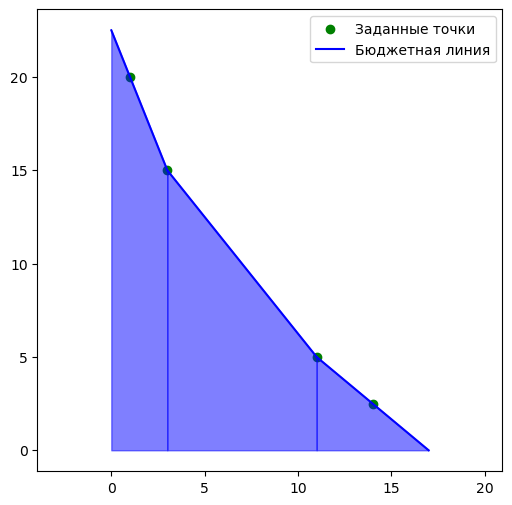

In [8]:
def plot_goods_parameters3(points):
    result = get_goods_parameters3(points)
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    
    if not result is None:
        px_1, py_1, px_2, py_2, th1, th2 = result[0], result[1], result[2], result[3], result[4], result[5]
        
        points = np.array(points)
        x_values = points.T[0]
        y_values = points.T[1]
        ax.scatter(x_values, y_values, label="Заданные точки", color="green")       
        ax.axis('equal')
        
        #Считаем крайние точки подставлением нулей в соответствующие координаты в уравнениях (1) и (3)
        x_max = (points[3][0]*px_2 + points[3][1]*py_1)/px_2
        y_max = (points[0][0]*px_1 + points[0][1]*py_2)/py_2
        
        #Считаем точки излома подставлением порогов в уравнения прямой среднего участка БО (т.к. мы уже знаем цены и координаты точек, через которые эта прямая проходит)
        x_mid1 = th1
        y_mid1 = (points[2][0]*px_2 + points[2][1]*py_2 - x_mid1*px_2)/py_2
        
        y_mid2 =th2
        x_mid2 =(points[2][0]*px_2 + points[2][1]*py_2 - y_mid2*py_2)/px_2
        
        #Чертим каждый участок бюджетного ограничения и заливаем области под ним
        x_points1 = [x_mid2, x_max] 
        y_points1 = [y_mid2, 0]
    
        x_points2 = [x_mid1, x_mid2] 
        y_points2 = [y_mid1, y_mid2]
    
        x_points3 = [0, x_mid1] 
        y_points3 = [y_max, y_mid1] 
        
        ax.plot(x_points1, y_points1, label="Бюджетная линия", color='blue')
        ax.plot(x_points2, y_points2, color='blue')
        ax.plot(x_points3, y_points3, color='blue')

        ax.fill_between(x_points1, y_points1, np.zeros_like(x_points1), color='blue', alpha=0.5)
        ax.fill_between(x_points2, y_points2, np.zeros_like(x_points2), color='blue', alpha=0.5)
        ax.fill_between(x_points3, y_points3, np.zeros_like(x_points3), color='blue', alpha=0.5)
        ax.legend() 
        plt.show()
        
    else:    
        fig.suptitle("Модель не предусматривает решения")

list_of_points = [[11, 5], [3, 15], [14, 2.5], [1, 20]]
plot_goods_parameters3(list_of_points)

In [9]:
def interactive_plot3(x11, x12, x21, x22, x31, x32, x41, x42):
    list_of_points = [[x11, x12], [x21, x22], [x31, x32], [x41, x42]]
    plot_goods_parameters3(list_of_points);

interact(interactive_plot3, x11=(1, 30), x12 = (1, 30), x21=(1, 30), x22 = (1, 30), x31=(1, 30), x32 = (1, 30), x41=(1, 30), x42 = (1, 30));

interactive(children=(IntSlider(value=15, description='x11', max=30, min=1), IntSlider(value=15, description='…

## Кривые безразличия. <font color="red">Задание 13</font> <a id="task_13"></a>

Для двух товаров из Модели 3 и кривой безразличия функции полезности Кобба-Дугласа найдите оптимальное решение и визуализируйте его при помощи интерактивного виджета.

Опишите, чем качественно ситуация с Моделью 3 отличается от ситуации с Моделями 1 и 2. Приведите примеры параметров Модели 3, которые демонстрируют данные различия.

**Ответ на качественный вопрос**
1) В данном случае у нас может быть от 1 до 3 разных участков БО, на каждом из которых может быть касание с кривой безразличия, т.е. может быть достигнут оптимум. В таком случае необходимо перебирать все точки касания и смотреть, в какой из них достигается наибольшая полезность.
Пример параметров: $px_1=6, px_2=3, th_1=3; py_1=9, py_2=2, th_2=3; alpha=0,4; budget=35$

2) При этом может сложиться и такая ситуация, в которой при нескольких точках касания полезности в этих точках одинаковые, т.е. оптимумов несколько. Тогда агент безразличен между этими точками. 

Пример параметров: $px_1=7, px_2=2, th_1=4; py_1=7, py_2=2, th_2=4; alpha=0,5, budget=50$

**Пояснение к решению и коду**
Поскольку в худшем случае у нас 3 разных куска бюджетной линии, нам нужно проверить точки касания кривой безразличия с каждым из них. Затем для каждого найденного касания мы считаем полезность и сравниваем полезности в разных точках - где полезность выше, то решение нам и подходит. Здесь в качестве бюджетов мы берем правые части уравнений (4), (5), (6), (7).

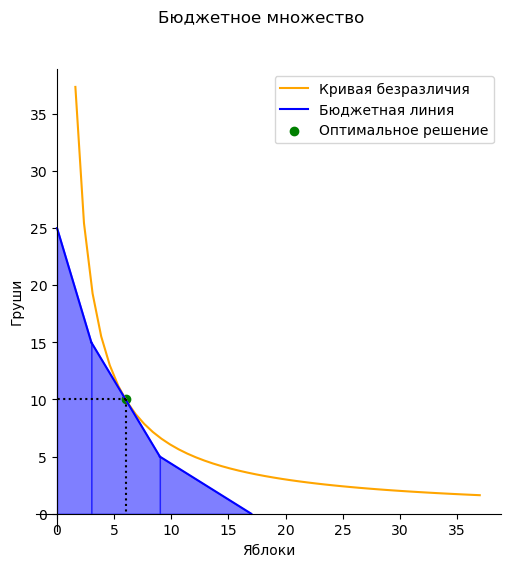

In [11]:
def Cobb_Douglas3(x, c, alpha):
    return math.pow(x, -alpha/(1-alpha))*math.pow(c, 1/(1-alpha))

def budget_Cobb_Douglas_solution3(g1: Good3, g2: Good3, budget, alpha):
 
    #Ищем решение на участке с уравнением (5)
    x_sol1 = alpha*(budget - g2.threshold*g2.price1+g2.threshold*g2.price2)/g1.price1
    y_sol1 = (1-alpha)*(budget- g2.threshold*g2.price1+g2.threshold*g2.price2)/g2.price2 
    #Если решение не попало в допустимую область, встаем на край этой области
    if x_sol1<0:
        x_sol1 = 0
        y_sol1 = (budget - g2.threshold*g2.price1+g2.price2*g2.threshold)/g2.price2
    elif y_sol1<0:
        y_sol1=0
        x_sol1=(budget - g1.threshold*g1.price1+g1.price2*g1.threshold)/g1.price2
    elif (x_sol1>g1.threshold or y_sol1<g2.threshold):
        x_sol1=g1.threshold
        y_sol1=(budget+g2.threshold*(g2.price2-g2.price1)-g1.price1*g1.threshold)/g2.price2
    util1 = math.pow(x_sol1, alpha)*math.pow(y_sol1, 1-alpha)
    
    #Ищем решение на участке с уравнением (6)
    x_sol2 = alpha*(budget - g1.threshold*g1.price1+g1.threshold*g1.price2)/g1.price2 
    y_sol2 = (1-alpha)*(budget- g1.threshold*g1.price1+g1.threshold*g1.price2)/g2.price1
    #Если решение не попало в допустимую область, встаем на край этой области
    if x_sol2<0:
        x_sol2 = 0
        y_sol2 = (budget - g2.threshold*g2.price1+g2.price2*g2.threshold)/g2.price2
    elif y_sol2<0:
        y_sol2=0
        x_sol2=(budget - g1.threshold*g1.price1+g1.price2*g1.threshold)/g1.price2
    elif (y_sol2>g2.threshold or x_sol2<g1.threshold):
        y_sol2=g2.threshold
        x_sol2=(budget+g1.threshold*(g1.price2-g1.price1) - g2.price1*g2.threshold)/g1.price2
    util2 = math.pow(x_sol2, alpha)*math.pow(y_sol2, 1-alpha)
    
    if (g1.price1*g1.threshold+g2.price1*g2.threshold<budget):
        #Ищем решение на участке с уранением (7)
        x_sol3 = alpha*(budget-g1.threshold*g1.price1 - g2.threshold*g2.price1 + g1.threshold*g1.price2 + g2.threshold*g2.price2)/g1.price2
        y_sol3 = (1-alpha)*(budget-g1.threshold*g1.price1 - g2.threshold*g2.price1 + g1.threshold*g1.price2 + g2.threshold*g2.price2)/g2.price2
        if (x_sol3<g1.threshold):
            x_sol3=g1.threshold
            y_sol3=(budget+g2.threshold*(g2.price2-g2.price1)-g1.price1*g1.threshold)/g2.price2
        elif (y_sol3<g2.threshold):
            y_sol3=g2.threshold
            x_sol3=(budget+g1.threshold*(g1.price2-g1.price1) - g2.price1*g2.threshold)/g1.price2
        util3 = math.pow(x_sol3, alpha)*math.pow(y_sol3, 1-alpha)
    else:
        #Ищем решение на участке с уравнением (4)
        x_sol3 = alpha*budget/g1.price1 
        y_sol3 = (1-alpha)*budget/g2.price1
        if (x_sol3>g1.threshold):
            x_sol3=g1.threshold
            y_sol3=(budget-g1.threshold*g1.price1)/g2.price1
        elif (y_sol3>g2.threshold):
            y_sol3=g2.threshold
            x_sol3=(budget-g2.threshold*g2.price1)/g1.price1
        util3 = math.pow(x_sol3, alpha)*math.pow(y_sol3, 1-alpha)
    
    #Проверяем, какое решение дает бОльшую полезность:
    if (util1>=util2 and util1>=util3):
        return x_sol1, y_sol1, util1
    elif (util2>=util1 and util2>=util3):
        return x_sol2, y_sol2, util2
    elif (util3>=util2 and util3>=util1):
        return x_sol3, y_sol3, util3
    
def plot_budget_Cobb_Douglas3(g1, g2, budget, alpha):
    x_solution, y_solution, c = budget_Cobb_Douglas_solution3(g1, g2, budget, alpha)
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    fig.suptitle("Бюджетное множество")
    
    #Строим кривую безразличия, соответствующую найденному уровню полезности
    x_values = np.linspace(0.1, (budget - g1.threshold*g1.price1 + g1.threshold*g1.price2)/g1.price2 + 20)
    y_values = np.array([Cobb_Douglas3(x, c, alpha) for x in x_values])
    filter = y_values < (budget - g2.threshold*g2.price1 + g2.threshold*g2.price2)/g2.price2 +20
    ax.plot(x_values[filter], y_values[filter], label="Кривая безразличия", color = 'orange')
    
    #Находим максимальные значния по х и у; им будут соответствовать нули по у и х (уравнения (3) и (2))
    x_max = (budget - g1.threshold*g1.price1+g1.price2*g1.threshold)/g1.price2
    y_max = (budget - g2.threshold*g2.price1+g2.price2*g2.threshold)/g2.price2
    
    #Находим точки излома (уравнение (4))
    x_mid2 =(budget - g1.threshold*g1.price1+g1.price2*g1.threshold - g2.threshold*g2.price1)/g1.price2
    y_mid2 =g2.threshold
    x_mid1 = g1.threshold
    y_mid1 = (budget - g2.threshold*g2.price1+g2.price2*g2.threshold - g1.threshold*g1.price1)/g2.price2
    
    #Находим точки излома (уравнение (1))
    x_in1 =g1.threshold
    y_in1 =(budget - g1.threshold*g1.price1)/g2.price1
    x_in2 =(budget-g2.threshold*g2.price1)/g1.price1
    y_in2 = g2.threshold
    
    if g1.price1*g1.threshold+g2.price1*g2.threshold<budget:
        listt = list([(x_max, 0), (x_mid1, y_mid1),  (x_mid2, y_mid2), (0, y_max)])
    else:
        listt = list([(x_max, 0), (x_in1, y_in1), (x_in2, y_in2), (0, y_max)])
       
    listt.sort(key=lambda x: x[0])
    
    #Нижний участок БО
    x_points1 = [listt[2][0], listt[3][0]] 
    y_points1 = [listt[2][1], listt[3][1]]
    
    #Средний участок БО
    x_points2 = [listt[1][0], listt[2][0]] 
    y_points2 = [listt[1][1], listt[2][1]]
    
    #Верхний участок БО
    x_points3 = [listt[0][0], listt[1][0]] 
    y_points3 = [listt[0][1], listt[1][1]]  
    
    #Строим все участки бюджетного ограничения и заливаем области под ними
    ax.plot(x_points1, y_points1, label="Бюджетная линия", color='blue')
    ax.fill_between(x_points1, y_points1, np.zeros_like(x_points1), color='blue', alpha=0.5)
    
    ax.plot(x_points2, y_points2, color='blue')
    ax.fill_between(x_points2, y_points2, np.zeros_like(x_points2), color='blue', alpha=0.5)
    
    ax.plot(x_points3, y_points3, color='blue')
    ax.fill_between(x_points3, y_points3, np.zeros_like(x_points3), color='blue', alpha=0.5)
    
    ax.scatter(x_solution, y_solution, label="Оптимальное решение", color='green')
    ax.plot([x_solution, 0], [y_solution, y_solution], 'k:')
    ax.plot([x_solution, x_solution], [y_solution, 0], 'k:')
    
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal')
    ax.legend()
    plt.show()

g1 = Good3("Яблоки", 10, 5, 3)
g2 = Good3("Груши", 8, 3, 5)
budget = 100
alpha = 0.5
plot_budget_Cobb_Douglas3(g1, g2, budget, alpha)

In [12]:
def interactive_plot3(px_1, px_2, py_1, py_2, th1, th2, budget, alpha):
    g1 = Good3("Яблоки", px_1, px_2, th1)
    g2 = Good3("Груши", py_1, py_2, th2)
    plot_budget_Cobb_Douglas3(g1, g2, budget, alpha);

interact(interactive_plot3, px_1=(1, 10), px_2 = (1, 10), py_1=(1, 10), py_2 = (1, 10), th1 = (0,10), th2=(0,10), budget=(1,200), alpha=(0.1,0.9));

interactive(children=(IntSlider(value=5, description='px_1', max=10, min=1), IntSlider(value=5, description='p…